<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
from matplotlib import pyplot as plt

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
print(pandas)

<module 'pandas' from '/Users/rbechler/miniconda2/envs/diplodatos-ayv/lib/python3.5/site-packages/pandas/__init__.py'>


In [4]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [5]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [7]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

<font color='green'>
Ambos graficos son iguales (varía la información en el eje de ordenadas). Creemos que ambos graficos son útiles, eligiriamos uno u otro dependiendo la información que querramos mostrar.
</font>

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

<font color='green'>
La forma de la distribución se puede deber a varios factores, entre ellos, creemos que uno de los mas fuertes es el aumento de registros de este tipo de casos de violencia.

Se ve una tendencia de aumento de violencia en los últimos años.
</font>

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

<font color='green'>
La probabilidad de que se de un acto de violencia antes del cambio del ultimo gobierno es del: 59.65%
</font>

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

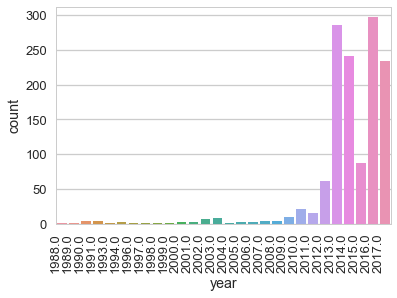

In [8]:
#Crear una imagen mostrando la distribución de los eventos por año
# Opcion A
#seaborn.distplot(dataset.year.dropna(), kde=False)

# Opcion B
ax1 = seaborn.countplot(dataset.year)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right");

In [9]:
# Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

freq_table = dataset.year.value_counts(normalize=True)

table_to_plot = freq_table.to_frame().reset_index()

# Renombrar las columnas
column_names = {"index":"year", "year": "fdp"}
table_to_plot = table_to_plot.rename(index=str, columns=column_names)

# descomentar la siguiente linea para ordenar por año
table_to_plot = table_to_plot.sort_values(by="year")

table_to_plot

,year,fdp
27,1988.0,0.000760
24,1989.0,0.000760
12,1990.0,0.003799
14,1991.0,0.003799
20,1993.0,0.001520
16,1994.0,0.002280
25,1996.0,0.000760
26,1997.0,0.000760
21,1998.0,0.001520
23,1999.0,0.001520


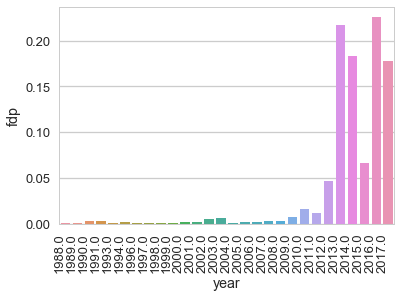

In [10]:
#Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.
ax2 = seaborn.barplot(data=table_to_plot, x="year", y="fdp")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right");

La probabilidad de que se de un acto de violencia antes del cambio del ultimo gobierno es de: 59.65%


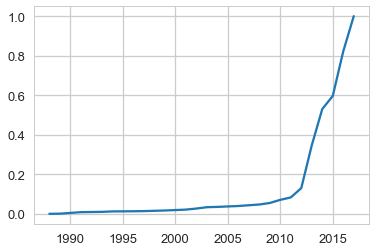

In [11]:
#Calcular la función de distribución acumulada de la variable Y y graficarla. 

# Calculr la acumulada por año (en orden ascendente de años)
fda = table_to_plot.cumsum(axis=0)["fdp"]

years = table_to_plot.year

# DataFrame con años y fda
fda_per_year = pandas.DataFrame({'year': years,'fda':fda});

plt.plot(fda_per_year["year"],fda_per_year["fda"]);

fda_gov = fda_per_year.loc[fda_per_year["year"] == 2015]["fda"].values[0]

print("La probabilidad de que se de un acto de violencia antes del cambio del ultimo gobierno es de: {:.2f}%".format(fda_gov*100))


## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

<font color='green'>
La cantidad de habitantes por provincia.
</font>

* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

<font color='green'>
Grafico de barras.
</font>

In [12]:
freq_prov_table = dataset.provincia.value_counts(normalize=True)

table_to_plot_prov = freq_prov_table.to_frame().reset_index()

# Renombrar las columnas
column_names_prov = {"index":"provincia", "provincia": "fdp"}
table_to_plot_prov = table_to_plot_prov.rename(index=str, columns=column_names_prov)

table_to_plot_prov

,provincia,fdp
0,Buenos Aires,0.693182
1,Ciudad de Buenos Aires,0.083097
2,Córdoba,0.036932
3,Chubut,0.026278
4,Chaco,0.020597
5,Rio Negro,0.019176
6,Neuquen,0.014915
7,Santa Fe,0.014205
8,Salta,0.012074
9,Mendoza,0.012074


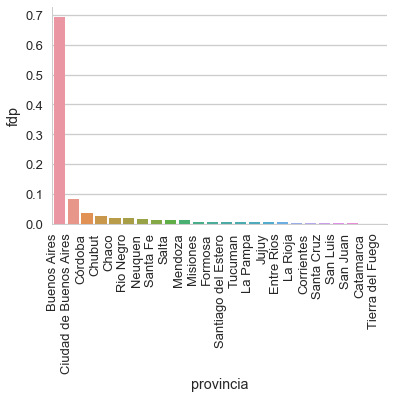

In [13]:
ax_prov = seaborn.barplot(data=table_to_plot_prov,
   x='provincia', y='fdp')
ax_prov.set_xticklabels(ax_prov.get_xticklabels(), rotation=90, ha="right")
seaborn.despine()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [14]:

pandas.pivot_table(dataset,index="provincia", columns= "year", aggfunc=len, fill_value=0)



Unnamed: 16                                            \
year                        1988.0 1989.0 1990.0 1991.0 1993.0 1994.0 1996.0   
provincia                                                                      
Buenos Aires                     0      1      0      3      0      1      0   
Catamarca                        0      0      0      0      0      0      0   
Chaco                            0      0      4      0      0      0      0   
Chubut                           0      0      0      0      0      0      0   
Ciudad de Buenos Aires           1      0      0      2      0      0      1   
Corrientes                       0      0      0      0      0      0      0   
Córdoba                          0      0      0      0      0      0      0   
Entre Rios                       0      0      0      0      0      0      0   
Formosa                          0      0      0      0      0      0      0   
Jujuy                            0      0      0      0      0      0      0   
La Pampa                         0      0      0      0      0      0      0   
La Rioja                         0      0      0      0      0      0      0   
Mendoza                          0      0      1      0      0      0      0   
Misiones                         0      0      0      0      0      0      0   
Neuquen                          0      0      0      0      0      1      0   
Rio Negro                        0      0      0      0      0      0      0   
Salta                            0      0      0      0      0      0      0   
San Juan                         0      0      0      0      0      0      0   
San Luis                         0      0      0      0      2      0      0   
Santa Cruz                       0      0      0      0      0      0      0   
Santa Fe                         0      0      0      0      0      1      0   
Santiago del Estero              0      0      0      0      0      0      0   
Tierra del Fuego                 0      0      0      0      0      0      0   
Tucuman                          0      0      0      0      0      0      0   

                                             ...   violencia_salud         \
year                   1997.0 1998.0 1999.0  ...            2008.0 2009.0   
provincia                                    ...                            
Buenos Aires                0      0      0  ...                 3      4   
Catamarca                   0      0      0  ...                 0      0   
Chaco                       0      0      0  ...                 0      0   
Chubut                      0      0      0  ...                 0      0   
Ciudad de Buenos Aires      1      1      0  ...                 1      5   
Corrientes                  0      0      0  ...                 0      0   
Córdoba                     0      0      0  ...                 0      0   
Entre Rios                  0      0      0  ...                 0      0   
Formosa                     0      0      0  ...                 0      0   
Jujuy                       0      0      0  ...                 1      0   
La Pampa                    0      0      0  ...                 0      0   
La Rioja                    0      0      1  ...                 0      0   
Mendoza                     0      0      0  ...                 0      0   
Misiones                    0      0      0  ...                 0      0   
Neuquen                     0      1      0  ...                 0      0   
Rio Negro                   0      0      0  ...                 0      0   
Salta                       0      0      0  ...                 0      0   
San Juan                    0      0      0  ...                 0      0   
San Luis                    0      0      0  ...                 0      0   
Santa Cruz                  0      0      0  ...                 0      0   
Santa Fe                    0      0      0  ...                 0      0   
Santiago del E

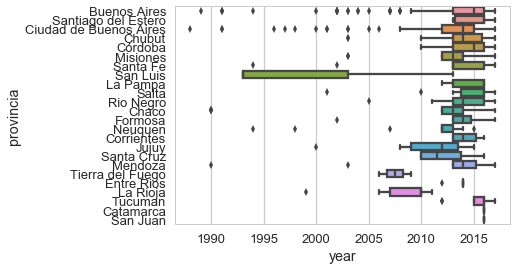

In [15]:
seaborn.boxplot(x="year", y="provincia", data=dataset);

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [16]:
fdp_context_1 = dataset.contexto1.value_counts(normalize=True)

fdp_context1_table = fdp_context_1.reset_index(name="fdp").rename(index=str, columns={"index":"contexto_1"})

org_seguridad = ["Penal / Complejo Penitenciario PROVINCIAL", 
                "Penal / Complejo Penitenciario FEDERAL", 
                "Comisaría", "Centros de Detención Previos al Juicio (Alcaidia)", 
                "Móviles y medios de transporte de Fuerzas de Seguridad",
               "Centros de Detención Preventiva",
               "Instalaciones de la Gendarmería Nacional",
               "Escuelas de Formación Fuerzas Provinciales",
               "Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)",
               "Escuelas de Formación Fuerzas Nacionales"]
fdpZ = fdp_context1_table.loc[fdp_context1_table["contexto_1"].isin(org_seguridad)].sum()

print("La fdp de la variable aleatoria Z es: fdp_z: {:.2f}%".format(float(fdpZ[1])*100))

La fdp de la variable aleatoria Z es: fdp_z: 81.08%


## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia física’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?

<font color='green'>
    La probabilidad de 21.19% de que exista violencia psiquica dado que existe o existio violencia fisica nos parece extraño, generalmente ambos tipos de violencia se dan conjuntamente. Esto nos hace pensar que, o los datos han sido recabados de manera pobre u otra posibilidad, es que las victimas relacionen el término violencia más con la parte física que con la psiquica, es decir que las personas no se percaten de la existencia de violencia psiquica (inclusive que lo tomen como un trato normal (como creemos debe suceer a menudo en las penitenciarias)).
</font>
   
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

<font color='green'>
En base a los resultados obtenidos concluimos que las v.a N y M son dependientes
</font>

In [97]:
# Para calcular probabilidad conjunta P (N/M) utilizaremos: P(N∧M)/P(M)
# Primero calcularemos P(M)

tabla_violencia_fisica = dataset.violencia_fisica.value_counts(dropna=False).to_frame()

# Filtramos casos que no hubo violencia fisica y valores NaN

tabla_violencia_fisica = dataset.dropna(subset=['violencia_fisica'])

tabla_violencia_fisica = tabla_violencia_fisica[tabla_violencia_fisica.violencia_fisica != "Ninguno"]



total_violencia_fisica = len(tabla_violencia_fisica)
total_casos = len(dataset)

p_m = total_violencia_fisica / float(total_casos)

print("P(M): {}".format(p_m))

# Ahora calculamos P(N∧M)

tabla_viol_psiquica_fisica = tabla_violencia_fisica.dropna(subset=["violencia_psiquica"])

tabla_viol_psiquica_fisica = tabla_viol_psiquica_fisica[tabla_viol_psiquica_fisica.violencia_psiquica != "Ninguno"]

total_viol_psiquica_fisica = len(tabla_viol_psiquica_fisica)

p_n_and_m = total_viol_psiquica_fisica / float(total_casos)

print("P(N∧M)): {}".format(p_n_and_m))

# Ahora podemos calcular P (N/M) = P(N∧M)/P(M)

P_n_m = p_n_and_m / p_m

print("P(N/M)): {}".format(P_n_m))

P(M): 0.4065323141070188
P(N∧M)): 0.08617095205003475
P(N/M)): 0.21196581196581196


In [103]:
# Para verificar si las variables N y M son independientes procederemos a verificar si P(N∧M) = P(N)P(M)
# Nos falta solo clacular P(N)

tabla_violencia_psiquica = dataset.violencia_psiquica.value_counts(dropna=False).to_frame()

# Filtramos casos que no hubo violencia fisica y valores NaN

tabla_violencia_psiquica = dataset.dropna(subset=['violencia_psiquica'])

tabla_violencia_psiquica = tabla_violencia_psiquica[tabla_violencia_psiquica.violencia_psiquica != "Ninguno"]

total_violencia_psiquica = len(tabla_violencia_psiquica)

p_n = total_violencia_psiquica / float(total_casos)

print("P(M): {}".format(p_m))
print("P(N): {}\n".format(p_n))

p_n_por_m = p_m * p_n

print("P(N)P(M): {} ".format(p_n_por_m))
print("P(N∧M)): {}".format(p_n_and_m))

print("\nEn base a los resultados obtenidos concluimos que las v.a N y M son dependientes")


P(M): 0.4065323141070188
P(N): 0.33634468380820015

P(N)P(M): 0.13673498264614115 
P(N∧M)): 0.08617095205003475
En base a los resultados obtenidos concluimos que las v.a N y M son dependientes
